In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv.imread('imgs/target_raw.jpg')

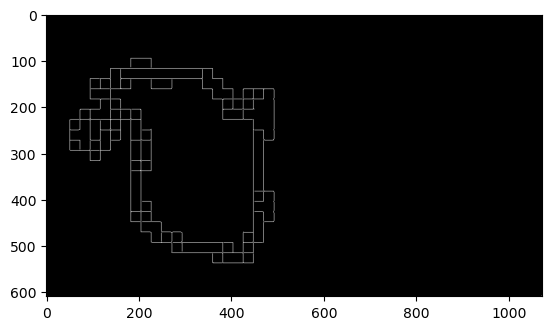

In [3]:
# Goal: pixelate the image according to its color and pixel pattern
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 1. get pixel size using edge detection
edges = cv.Canny(gray, 100, 200)
edges = (edges[:, :] > 128) * 255
plt.imshow(edges, cmap='gray')

In [4]:
edges.shape

(609, 1073)

In [5]:
# get the pixel size
pixel_size = 0
h = 300
reached, passed = False, False
for w in range(img.shape[1]):
    if edges[h, w] == 255 and not reached:
        reached = True
    elif reached and not passed and edges[h, w] == 0:
        passed = True
    elif passed and edges[h, w] == 255:
        break
    if reached:
        pixel_size += 1
print(pixel_size)

22


In [6]:
print(img.shape)

(609, 1073, 3)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


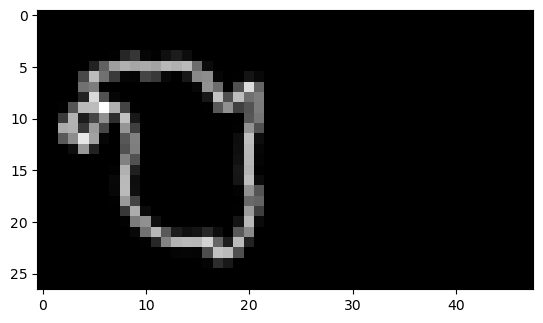

In [7]:
pixel_size = 22
w, h = img.shape[1] // pixel_size, img.shape[0] // pixel_size
pixelized = np.zeros((h, w), dtype=np.uint8)
for i in range(h):
    for j in range(w):
        h_idx = i * pixel_size + pixel_size // 2
        w_idx = j * pixel_size + pixel_size // 2
        pixelized[i, j] = gray[h_idx, w_idx]
plt.imshow(pixelized, cmap='gray')
print(pixelized)

In [8]:
# save as bmp
cv.imwrite('imgs/target_pixelized.bmp', pixelized)

True

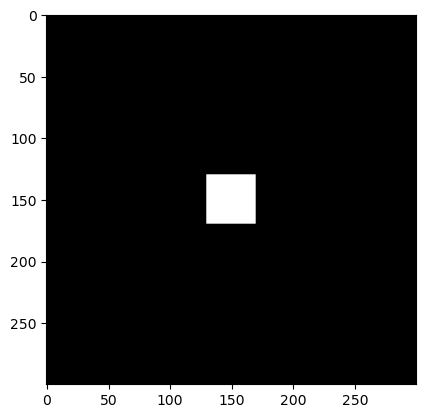

In [27]:
# some testings for 2D FFT

# generate some simple example
img = np.zeros((300, 300), dtype=np.uint8)
# repetitive sinusoidal pattern
for i in range(130, 170):
    for j in range(130, 170):
        img[i, j] = 255
plt.imshow(img, cmap='gray')

/var/folders/4r/xpql1tx54qvg4kzb9d3kmpqm0000gn/T/ipykernel_12331/414481278.py:4: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(np.abs(fshift))


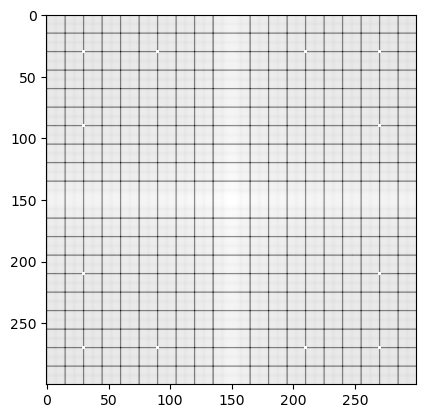

In [28]:
# 2D FFT
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap='gray')

In [7]:
u = np.empty((20, 20), dtype=np.complex_)
u.real = np.cos(np.pi * np.arange(20) / 10)
u.imag = np.sin(np.pi * np.arange(20) / 10)
aberration = np.outer(u, u.conj())

array([[ 1.00000000e+00+0.00000000e+00j,  9.51056516e-01+3.09016994e-01j,
         8.09016994e-01+5.87785252e-01j,  5.87785252e-01+8.09016994e-01j,
         3.09016994e-01+9.51056516e-01j,  6.12323400e-17+1.00000000e+00j,
        -3.09016994e-01+9.51056516e-01j, -5.87785252e-01+8.09016994e-01j,
        -8.09016994e-01+5.87785252e-01j, -9.51056516e-01+3.09016994e-01j,
        -1.00000000e+00+1.22464680e-16j, -9.51056516e-01-3.09016994e-01j,
        -8.09016994e-01-5.87785252e-01j, -5.87785252e-01-8.09016994e-01j,
        -3.09016994e-01-9.51056516e-01j, -1.83697020e-16-1.00000000e+00j,
         3.09016994e-01-9.51056516e-01j,  5.87785252e-01-8.09016994e-01j,
         8.09016994e-01-5.87785252e-01j,  9.51056516e-01-3.09016994e-01j],
       [ 1.00000000e+00+0.00000000e+00j,  9.51056516e-01+3.09016994e-01j,
         8.09016994e-01+5.87785252e-01j,  5.87785252e-01+8.09016994e-01j,
         3.09016994e-01+9.51056516e-01j,  6.12323400e-17+1.00000000e+00j,
        -3.09016994e-01+9.51056516e-0